In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the df_titanic_modifiedset into pandas df_titanic_modifiedframe
df_titanic_test = pd.read_csv('tested.csv')
df_titanic_train = pd.read_csv('train.csv')

# inspect the df_titanic_modifiedset
# print(df_titanic_test.head())  # View the first few rows
# print(df_titanic_train.head())  # View the first few rows

print(df_titanic_test.info())
print(df_titanic_train.info())  # Get an overview of the df_titanic_modified types and missing values
# print(df_titanic.describe())  # Summary statistics for numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [3]:
# Print the count of missing values in the training set
print("the train set NaN count: \n", df_titanic_train.isnull().sum())

# Print the count of missing values in the test set
print("\n\nThe test set NaN count: \n", df_titanic_test.isnull().sum())


the train set NaN count: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The test set NaN count: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


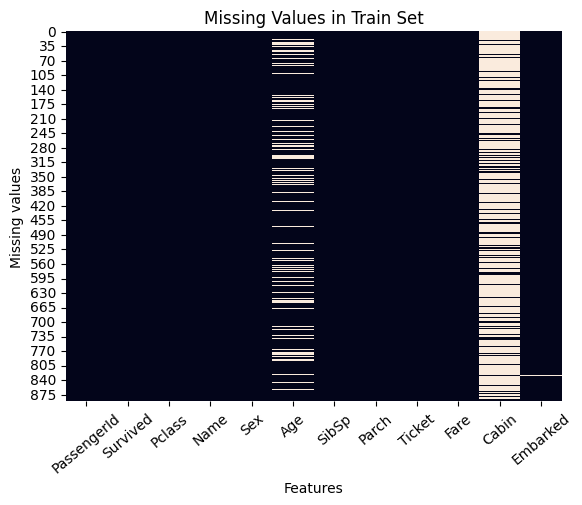

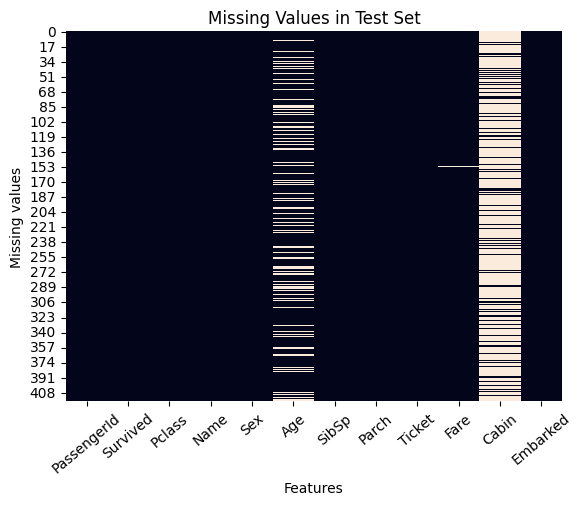

In [4]:
# perform EDA and df_titanic_modified cleaning

# plot the null values
sns.heatmap(df_titanic_train.isnull(), cbar=False)
plt.title('Missing Values in Train Set')
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.xticks(rotation=40)
plt.show()

sns.heatmap(df_titanic_test.isnull(), cbar=False)
plt.title('Missing Values in Test Set')
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.xticks(rotation=40)
plt.show()

In [5]:
df_pivot = pd.pivot_table(df_titanic_train, index='Survived', values=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], aggfunc='count')
print(df_pivot)

          Age  Cabin  Embarked  Fare  Parch  Pclass  Sex  SibSp  Ticket
Survived                                                               
0         424     68       549   549    549     549  549    549     549
1         290    136       340   342    342     342  342    342     342


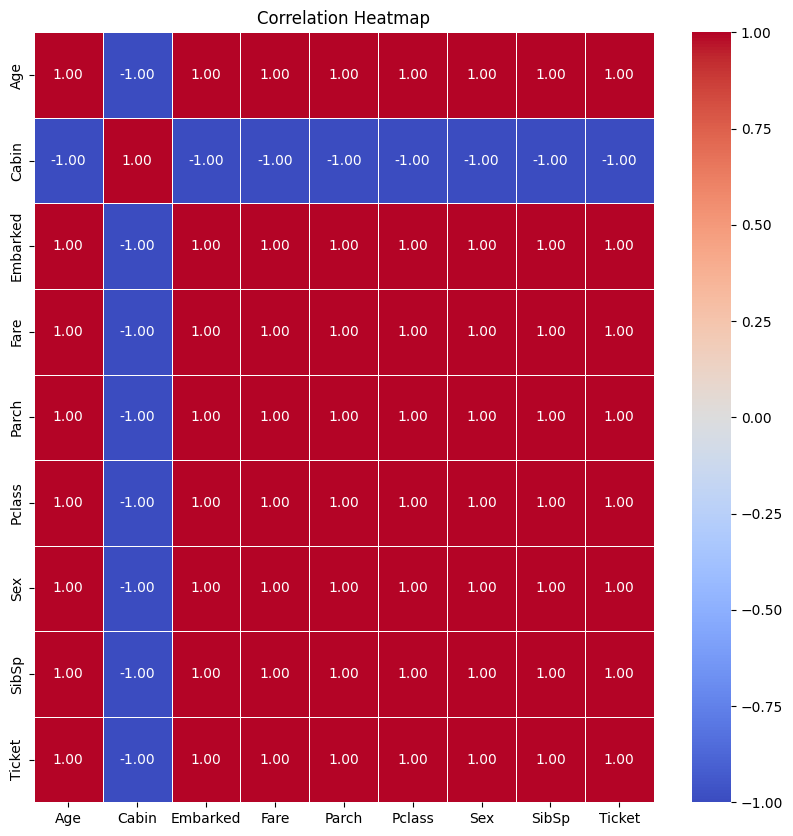

In [6]:
# plot the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot.corr(), 
            cmap='coolwarm', 
            linewidths=0.5, 
            annot=True, 
            fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


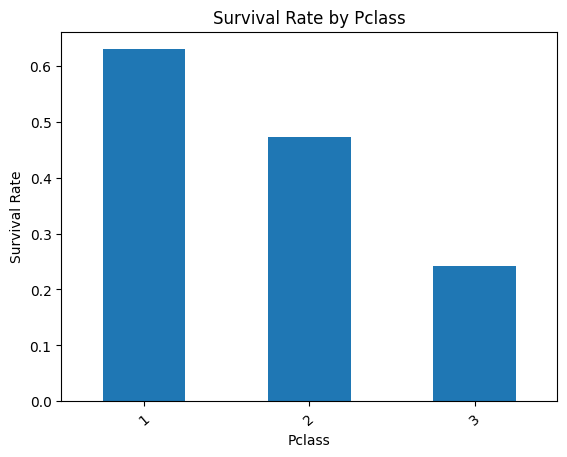

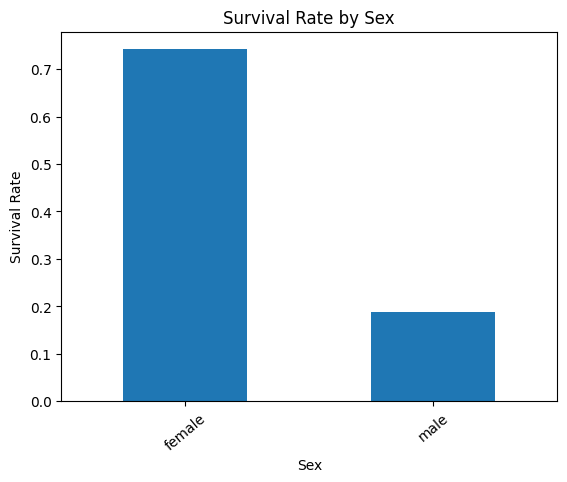

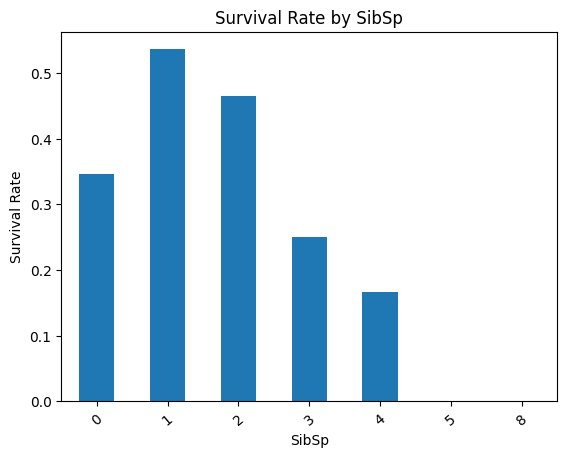

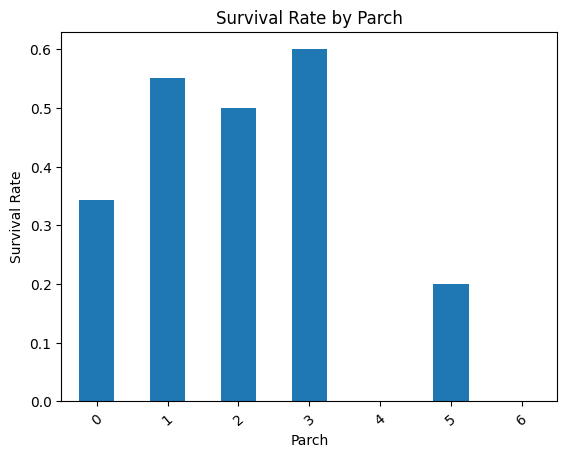

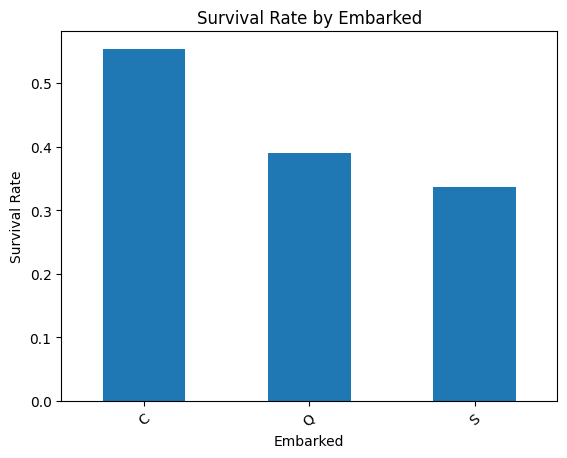

In [7]:
import matplotlib.pyplot as plt

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in features:
    plt.figure()
    df_titanic_train.groupby(feature)['Survived'].mean().plot(kind='bar')
    plt.title(f'Survival Rate by {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=40, size=10)
    plt.ylabel('Survival Rate')
    plt.show()

In [8]:
# print(df_titanic_train['Age'].value_counts())

# make a copy of the df_titanic_modifiedframe for the modification
df_titanic_modified = df_titanic_train.copy()
df_test = df_titanic_test.copy()

thershhold = len(df_titanic_modified) * 0.05  # the threshold for drop nan
print(f"the thershhold for drop nan: ", {thershhold})

# dealing with nan in the Age column
Age_mean = df_titanic_modified['Age'].mean()
Age_median = df_titanic_modified['Age'].median()
Age_mode = df_titanic_modified['Age'].mode().values[0]  # mode() returns a Series, so we need to get the value

print(f"Mean: {Age_mean}, Median: {Age_median}, Mode: {Age_mode}")
df_titanic_modified['Age'] = df_titanic_modified['Age'].fillna(Age_median)

df_titanic_modified.drop(columns=['Cabin'], inplace=True)

embark_mode = df_titanic_modified['Embarked'].mode() 
print(embark_mode)
df_titanic_modified['Embarked'] = df_titanic_modified['Embarked'].fillna(embark_mode[0])

print(df_titanic_modified.isna().sum())

the thershhold for drop nan:  {44.550000000000004}
Mean: 29.69911764705882, Median: 28.0, Mode: 24.0
0    S
Name: Embarked, dtype: object
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
print(df_test['Age'].value_counts())

# make a copy of the df_test data frame for the modification
df_test = df_titanic_test.copy()

thershhold = len(df_test) * 0.05  # the threshold for drop nan
print(f"the thershhold for drop nan: ", {thershhold})

# dealing with nan in the Fare column
fare_mean = df_test['Fare'].mean().round(2)
print(fare_mean)
df_test['Fare'] = df_test['Fare'].fillna(fare_mean)
print(f"the fare nan count: ", {df_test['Fare'].isna().sum()})

# dealing with nan in the Age column
Age_mean = df_test['Age'].mean()
Age_median = df_test['Age'].median()
Age_mode = df_test['Age'].mode().values[0]  # mode() returns a Series, so we need to get the value

print(f"Mean: {Age_mean}, Median: {Age_median}, Mode: {Age_mode}")
df_test['Age'] = df_test['Age'].fillna(Age_median)

df_test.drop(columns=['Cabin'], inplace=True)

print(df_test.isna().sum())

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64
the thershhold for drop nan:  {20.900000000000002}
35.63
the fare nan count:  {np.int64(0)}
Mean: 30.272590361445783, Median: 27.0, Mode: 21.0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
# encode categorical variables

df_titanic_modified['Embarked'] = df_titanic_modified['Embarked'].astype('category')

df_titanic_modified['Sex'] = df_titanic_modified['Sex'].map({'male': 0, 'female': 1})

df_titanic_modified = pd.get_dummies(df_titanic_modified, columns=['Embarked'], dtype='int')

print(df_titanic_modified[['Survived', 'Pclass', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())
# PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked
# df_titanic_modified.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True

   Survived  Pclass  Sex  Embarked_C  Embarked_Q  Embarked_S
0         0       3    0           0           0           1
1         1       1    1           1           0           0
2         1       3    1           0           0           1
3         1       1    1           0           0           1
4         0       3    0           0           0           1


In [11]:
# encode categorical variables

df_test['Embarked'] = df_test['Embarked'].astype('category')

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

df_test = pd.get_dummies(df_test, columns=['Embarked'], dtype='int')

print(df_test[['Survived', 'Pclass', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())
# PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked
# df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True

   Survived  Pclass  Sex  Embarked_C  Embarked_Q  Embarked_S
0         0       3    0           0           1           0
1         1       3    1           0           0           1
2         0       2    0           0           1           0
3         0       3    0           0           0           1
4         1       3    1           0           0           1


In [12]:
# data preprocessing and feature engineering
df_titanic_modified['FamilySize'] = df_titanic_modified['SibSp'] + df_titanic_modified['Parch'] + 1

df_titanic_modified['Title'] = df_titanic_modified['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# print(df_titanic_modified['Title'].value_counts())

def map_title(title):
    if title == 'Mr':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mrs':
        return 3
    elif title == 'Master':
        return 4
    else:
        return 5

df_titanic_modified['Title'] = df_titanic_modified['Title'].apply(map_title)


print(df_titanic_modified[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

   Title  Survived
0      1  0.156673
1      2  0.697802
2      3  0.792000
3      4  0.575000
4      5  0.444444


In [13]:
# data preprocessing and feature engineering
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# print(df_test['Title'].value_counts())

def map_title(title):
    if title == 'Mr':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mrs':
        return 3
    elif title == 'Master':
        return 4
    else:
        return 5

df_test['Title'] = df_test['Title'].apply(map_title)


print(df_test[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

   Title  Survived
0      1  0.000000
1      2  1.000000
2      3  1.000000
3      4  0.000000
4      5  0.285714


In [14]:
df_titanic_modified.drop(['Ticket', 'PassengerId', 'SibSp', 'Parch', 'Name'], axis=1, inplace=True)
print(df_titanic_modified.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    int64  
 6   Embarked_Q  891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
 8   FamilySize  891 non-null    int64  
 9   Title       891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB
None


In [15]:
df_test.drop(['Ticket', 'PassengerId', 'SibSp', 'Parch', 'Name'], axis=1, inplace=True)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         418 non-null    float64
 4   Fare        418 non-null    float64
 5   Embarked_C  418 non-null    int64  
 6   Embarked_Q  418 non-null    int64  
 7   Embarked_S  418 non-null    int64  
 8   FamilySize  418 non-null    int64  
 9   Title       418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB
None


Survived
0    266
1    152
Name: count, dtype: int64


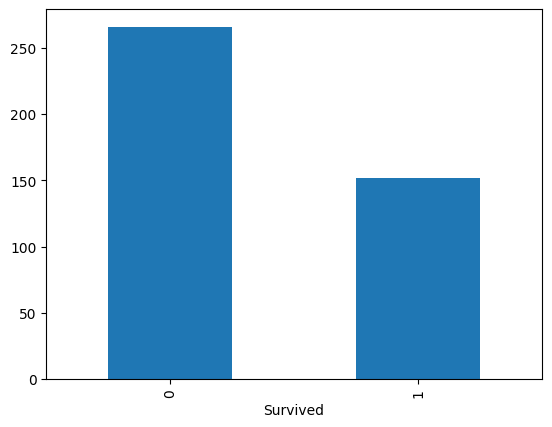

In [16]:
df_test['Survived'].value_counts().plot(kind='bar')
print(df_test['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


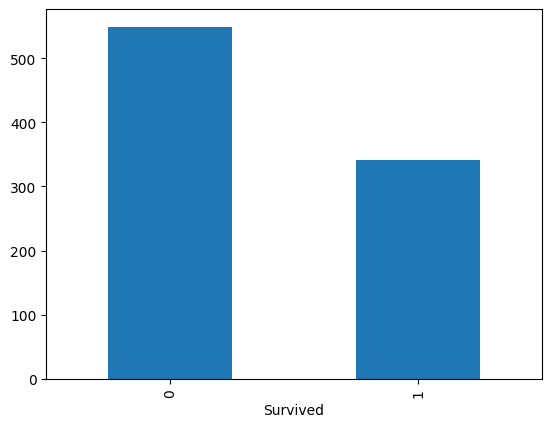

In [17]:
df_titanic_modified['Survived'].value_counts().plot(kind='bar')
print(df_titanic_modified['Survived'].value_counts())

In [18]:
# split the df_titanic_modifiedset into train and test sets
X_train = df_titanic_modified.drop('Survived', axis=1)
y_train = df_titanic_modified['Survived']

X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

# print the shapes of the train and test sets
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("the shape of the resampled X,y: ", X_resampled.shape, y_resampled.shape)
# Optional: Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

X_train.shape:  (891, 9)
y_train.shape:  (891,)
X_test.shape:  (418, 9)
y_test.shape:  (418,)
the shape of the resampled X,y:  (1098, 9) (1098,)


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

CV = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Cross-Validation Score: {CV}")
print(f"Mean Cross-Validation Score: {CV.mean()}""\n")

y_pred = logreg.predict(X_test)

print("for the logistic Regression momdel: \n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Cross-Validation Score: [0.81564246 0.81460674 0.78651685 0.82022472 0.83146067]
Mean Cross-Validation Score: 0.8136902893729208

for the logistic Regression momdel: 

Accuracy Score: 0.8947368421052632
Confusion Matrix: 
 [[222  44]
 [  0 152]]
F1 Score: 0.8735632183908046
Precision Score: 0.7755102040816326
Recall Score: 1.0


In [20]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)


CV = cross_val_score(rfc, X_resampled, y_resampled, cv=5)
print(f"Cross-Validation Score: {CV}")
print(f"Mean Cross-Validation Score: {CV.mean()}""\n")

rfc.fit(X_resampled, y_resampled)

y_pred = rfc.predict(X_test)

print("for the RandomForestClassifer model: \n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")


Cross-Validation Score: [0.78636364 0.80909091 0.83181818 0.87214612 0.84018265]
Mean Cross-Validation Score: 0.8279202988792029

for the RandomForestClassifer model: 

Accuracy Score: 0.7870813397129187
Confusion Matrix: 
 [[209  57]
 [ 32 120]]
F1 Score: 0.729483282674772
Precision Score: 0.6779661016949152
Recall Score: 0.7894736842105263


In [21]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
CV_score = cross_val_score(rfc, X_resampled, y_resampled, cv=cv_strat)
print(f"Cross-Validation Score: {CV_score}")
print(f"Mean Cross-Validation Score: {CV_score.mean()}""\n")

rfc.fit(X_resampled, y_resampled)

y_pred = rfc.predict(X_test)

print("for the RandomForestClassifer model: \n")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")


Cross-Validation Score: [0.83181818 0.82727273 0.86363636 0.85388128 0.84474886]
Mean Cross-Validation Score: 0.8442714819427148

for the RandomForestClassifer model: 

Accuracy Score: 0.7870813397129187
Confusion Matrix: 
 [[209  57]
 [ 32 120]]
F1 Score: 0.729483282674772
Precision Score: 0.6779661016949152
Recall Score: 0.7894736842105263
